# Predict Blood Donation for Future Expectancy:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the blood donations data:

transfusion_df = pd.read_csv("transfusion.data", sep = ",")
transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
transfusion_df.shape

(748, 5)

In [4]:
transfusion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
#Checking whether any null values present in the dataset or not:

transfusion_df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
transfusion_df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
transfusion_df.iloc[:,4].mean()

0.23796791443850268

#Looks the data is imbalanced, it says 23.8% of people he/she donated blood in March 2007 and 76.2% of the people will not donate. 

### Our dataset has all numerical values and there is no missing values present in it.

### Here we need to predict the future blood donation of the donors,  based on whether he/she donated blood in March 2007 or not feature, So this column is our Target Variable

In [9]:
transfusion_df = transfusion_df.rename(columns={"whether he/she donated blood in March 2007":"target"})

In [10]:
transfusion_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Training data and Testing Data Split:

As out Target column resulted we gonna split the 76% of data for training and remaining 24% is for Testing.

In [11]:
X = transfusion_df.drop("target", axis=1)
y = transfusion_df["target"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.24, random_state=0, stratify=y)

In [14]:
print("X_train :",X_train.shape)
print()
print("X_test :", X_test.shape)
print()
print("y_train :", y_train.shape)
print()
print("y_test :", y_test.shape)

X_train : (568, 4)

X_test : (180, 4)

y_train : (568,)

y_test : (180,)


# Let's work with AutomatedMachineLearning Library TPOT

In [15]:
from tpot import TPOTClassifier

tpot_Cls = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot_Cls.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8099518708275113

Generation 2 - Current best internal CV score: 0.8187393261915851

Generation 3 - Current best internal CV score: 0.8187393261915851

Generation 4 - Current best internal CV score: 0.8187393261915851

10.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(DecisionTreeClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=17, n_estimators=100, subsample=0.25), criterion=gini, max_depth=2, min_samples_leaf=19, min_samples_split=20), C=5.0, dual=False, penalty=l2)


TPOTClassifier(max_time_mins=10, verbosity=2)

In [43]:
#Accuracy Check On Training split Data:

tpot_Cls.score(X_train, y_train)

0.823943661971831

In [44]:
#Accuracy Check On Testing split Data:

tpot_Cls.score(X_test, y_test)

0.7833333333333333

In [17]:
tpot_Cls.fitted_pipeline_

Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                        max_depth=8,
                                                                        max_features=0.8500000000000001,
                                                                        min_samples_leaf=20,
                                                                        min_samples_split=17,
                                                                        subsample=0.25))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=DecisionTreeClassifier(max_depth=2,
                                                                    min_samples_leaf=19,
                                                                    min_samples_split=20))),
                ('logisticregression', LogisticRegression(C=5.0))])

In [18]:
tpot_Cls.export("Tpot_Classifier_BloodDonationPrediction_Pipelines.py")

# Now we have AutoML code with us, Let's see by scaling the "Monetary (c.c. blood)" feature high varience can we able to obtain any better accuracy:

In [19]:
transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


If you see the standard deviations of all features, "Monetary (c.c. blood)" feature having very high varience comparing other features

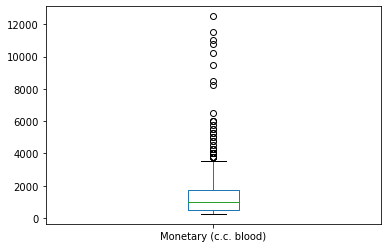

In [20]:
#Boxplot for "Monetary (c.c. blood)" feature data:

transfusion_df["Monetary (c.c. blood)"].plot(kind='box')

Monetary (c.c. blood) Feature contains lot of Outliers

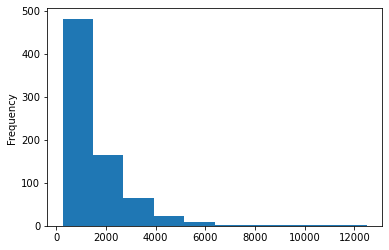

In [21]:
# Let's plot histogram for "Monetary (c.c. blood)" feature data:

transfusion_df["Monetary (c.c. blood)"].plot(kind="hist")

Yeah! This is Right skewed(Positive skewed data). when our data is not in a Gaussian Distribution(Normal), then the varience will be very high..

To convert Right Skewed data distribution into Normal distribution(in order to reduce the varience in the data), we can go for Log Normalisation technique.

In [22]:
#Log Normalisation:

Monetary = transfusion_df["Monetary (c.c. blood)"]
transfusion_df["Monetary (c.c. blood)"] = np.log10(Monetary)

In [23]:
transfusion_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,4.096910,98,1
1,0,13,3.511883,28,1
2,1,16,3.602060,35,1
3,2,20,3.698970,45,1
4,1,24,3.778151,77,0
...,...,...,...,...,...
743,23,2,2.698970,38,0
744,21,2,2.698970,52,0
745,23,3,2.875061,62,0
746,39,1,2.397940,39,0


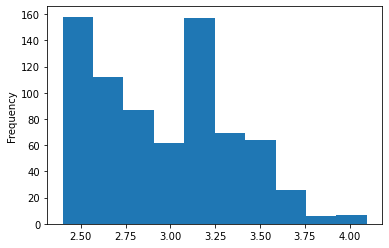

In [42]:
transfusion_df["Monetary (c.c. blood)"].plot(kind="hist")

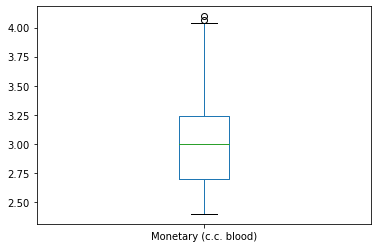

In [25]:
transfusion_df["Monetary (c.c. blood)"].plot(kind='box')

Now it is far better with very few outliers than before..


## Let's try implementing Logistic Regression AutoML Code with this Log Normalised dataset and see whether are we getting any better accuracy result than before or not:

In [26]:
#The Codes below are modified little bit in order to make fit:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator

In [27]:
tpot_data = transfusion_df
tpot_data  #Log Normalised data( Closely Normal Distributed )

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,4.096910,98,1
1,0,13,3.511883,28,1
2,1,16,3.602060,35,1
3,2,20,3.698970,45,1
4,1,24,3.778151,77,0
...,...,...,...,...,...
743,23,2,2.698970,38,0
744,21,2,2.698970,52,0
745,23,3,2.875061,62,0
746,39,1,2.397940,39,0


In [32]:
tpot_data = tpot_data.astype(float)

In [33]:
tpot_data.dtypes

Recency (months)         float64
Frequency (times)        float64
Monetary (c.c. blood)    float64
Time (months)            float64
target                   float64
dtype: object

In [35]:
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

In [36]:
# Average CV score on the training set was: 0.8187393261915851
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=17, n_estimators=100, subsample=0.25)),
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_leaf=19, min_samples_split=20)),
    LogisticRegression(C=5.0, dual=False, penalty="l2")
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
exported_pipeline.fit(training_features, training_target)

Pipeline(steps=[('stackingestimator-1',
                 StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                        max_depth=8,
                                                                        max_features=0.8500000000000001,
                                                                        min_samples_leaf=20,
                                                                        min_samples_split=17,
                                                                        subsample=0.25))),
                ('stackingestimator-2',
                 StackingEstimator(estimator=DecisionTreeClassifier(max_depth=2,
                                                                    min_samples_leaf=19,
                                                                    min_samples_split=20))),
                ('logisticregression', LogisticRegression(C=5.0))])

In [45]:
exported_pipeline.score(training_features, training_target)

0.7664884135472371

In [46]:
exported_pipeline.score(testing_features, testing_target)

0.8235294117647058

After Log Normalisation, the Logistic Regression algorithm is predicted the better result(82.35%) on testing data before(78.33%).